In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

In [3]:
from jakely import colorize

In [4]:
import coronagraph as cg

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _bspl
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/__init__.py:94: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ckdtree import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/__init__.py:95: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .qhull import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/_spherical_voronoi.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _voronoi
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/distance.py:121: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, go

In [5]:
sys.path.insert(1, "../scripts")

import spectroscopy

In [6]:
import scipy.interpolate

# Plot coronagraph Contrast and Throughput curves

## PIAA Coronagraph

In [7]:
cdat = np.loadtxt("../inputs/LUVOIR_coronagraphs/PIAA_Contrast1.txt", skiprows=1)
tdat = np.loadtxt("../inputs/LUVOIR_coronagraphs/PIAA_Throughput1.txt", skiprows=1)

In [8]:
separr = np.linspace(0.0, 32.0)

# Interpolate linearly using numpy
csep = np.interp(separr, cdat[:,0], cdat[:,1])
tsep = np.interp(separr, tdat[:,0], tdat[:,1])

# Interpolate linearly with extrapolation using scipy
csep2 = scipy.interpolate.interp1d(cdat[:,0], np.log10(cdat[:,1]), bounds_error = False, fill_value="extrapolate")
tsep2 = scipy.interpolate.interp1d(tdat[:,0], tdat[:,1], bounds_error = False, fill_value="extrapolate")

/Users/Jake/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


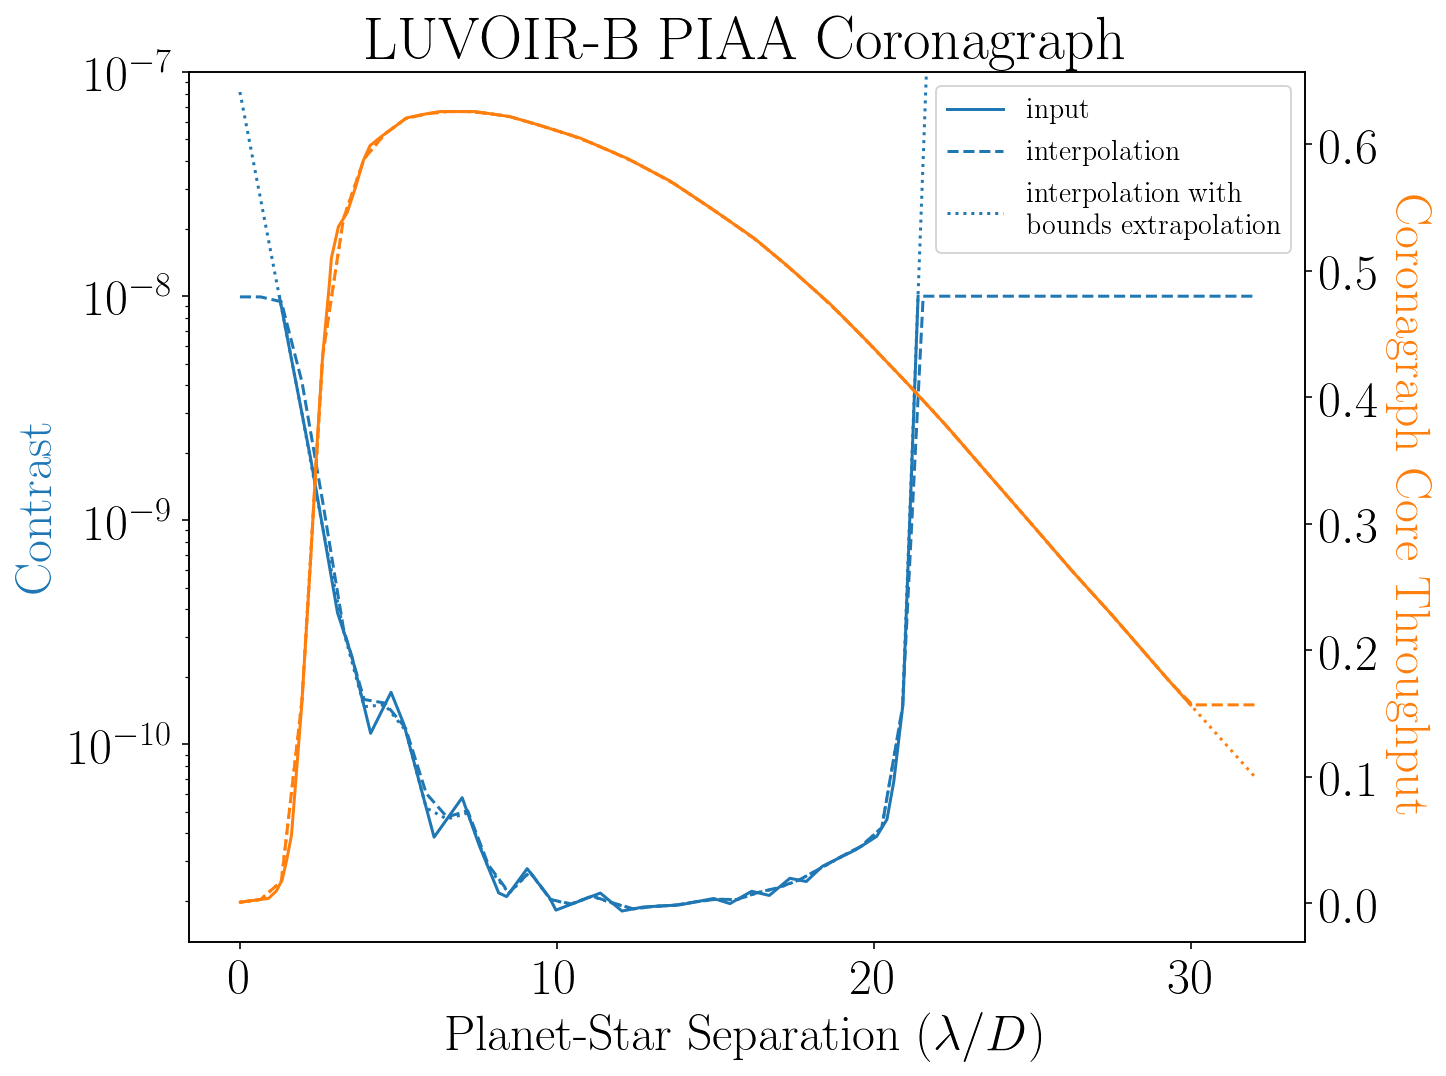

In [9]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel("Planet-Star Separation ($\lambda / D$)")
ax.set_title("LUVOIR-B PIAA Coronagraph")

ax.set_ylabel("Contrast", color = "C0")
ax.plot(cdat[:,0], cdat[:,1], color = "C0", label = "input")
ax.plot(separr, csep, color = "C0", ls = "dashed", label = "interpolation")
ax.set_yscale("log")

ax2 = ax.twinx()
ax2.set_ylabel("Coronagraph Core Throughput", color = "C1", rotation = 270, labelpad = 27)
ax2.plot(tdat[:,0], tdat[:,1], color = "C1")
ax2.plot(separr, tsep, color = "C1", ls = "dashed")

ylim = ax.get_ylim()

ax.plot(separr, 10.**csep2(separr), color = "C0", ls = "dotted", label = "interpolation with \nbounds extrapolation")
ax2.plot(separr, tsep2(separr), color = "C1", ls = "dotted")

ax.set_ylim(ylim)
ax.set_ylim(top = 1e-7)

ax.legend(fontsize = 14)

In [10]:
c_piaa = csep
t_piaa = tsep

## DMVC Coronagraph

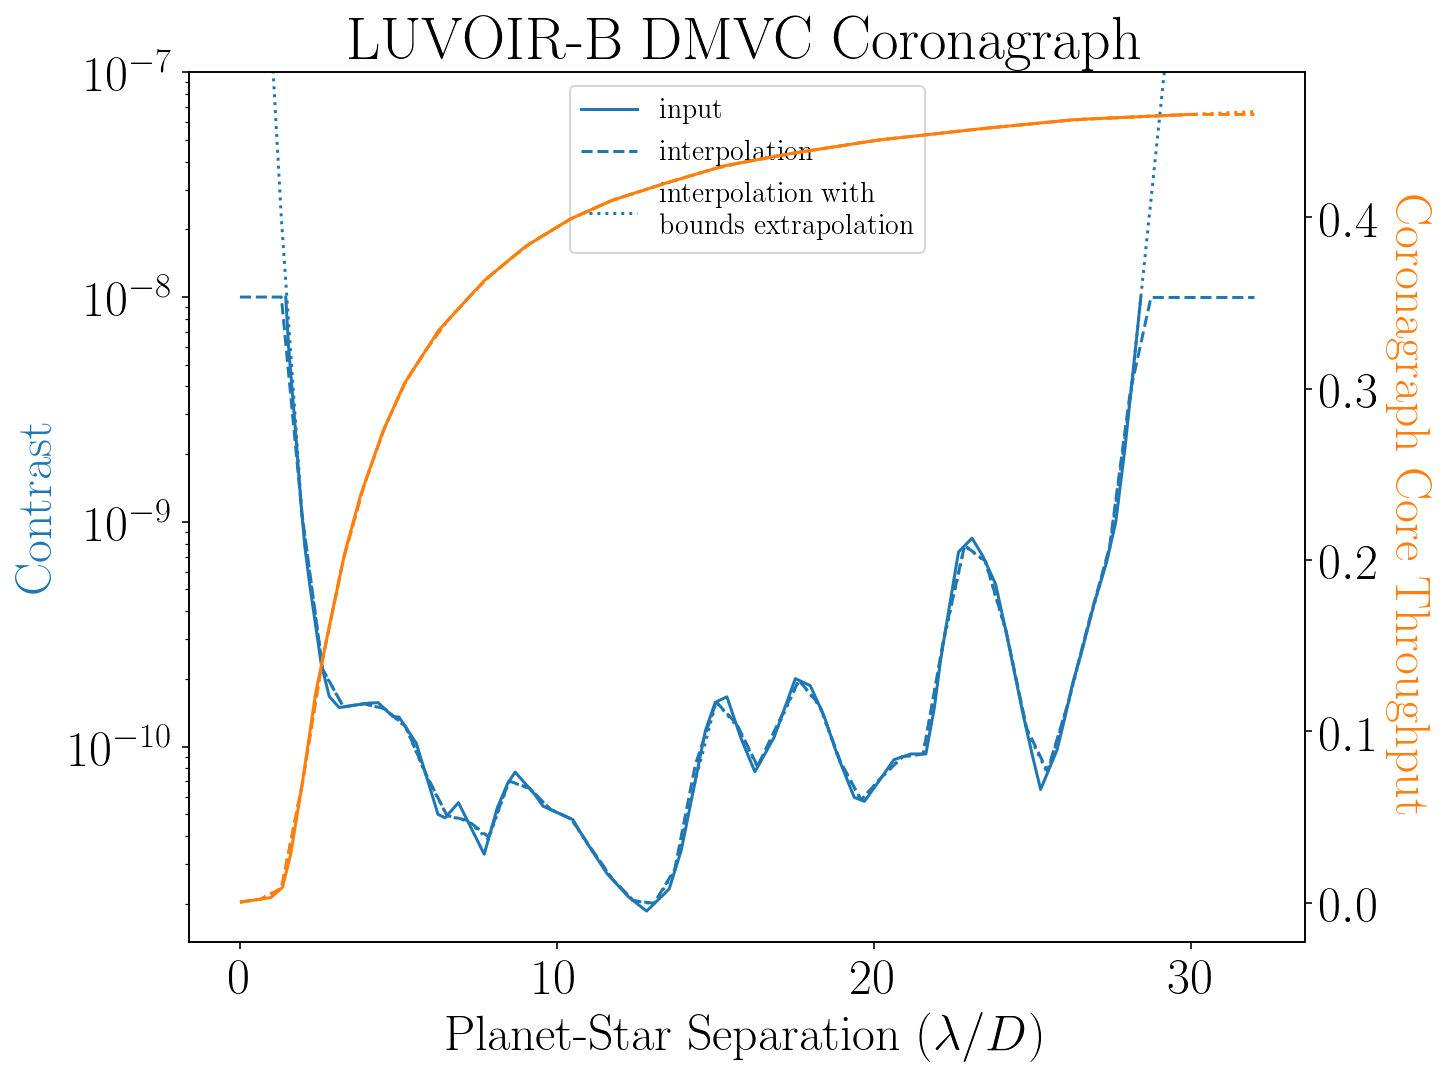

In [11]:
c_dmvc = np.loadtxt("../inputs/LUVOIR_coronagraphs/DMVC_Contrast1.txt", skiprows=1)
t_dmvc = np.loadtxt("../inputs/LUVOIR_coronagraphs/DMVC_Throughput1.txt", skiprows=1)

separr = np.linspace(0.0, 32.0)

# Interpolate linearly using numpy
csep = np.interp(separr, c_dmvc[:,0], c_dmvc[:,1])
tsep = np.interp(separr, t_dmvc[:,0], t_dmvc[:,1])

# Interpolate linearly with extrapolation using scipy
csep2 = scipy.interpolate.interp1d(c_dmvc[:,0], np.log10(c_dmvc[:,1]), bounds_error = False, fill_value="extrapolate")
tsep2 = scipy.interpolate.interp1d(t_dmvc[:,0], t_dmvc[:,1], bounds_error = False, fill_value="extrapolate")



fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel("Planet-Star Separation ($\lambda / D$)")
ax.set_title("LUVOIR-B DMVC Coronagraph")

ax.set_ylabel("Contrast", color = "C0")
ax.plot(c_dmvc[:,0], c_dmvc[:,1], color = "C0", label = "input")
ax.plot(separr, csep, color = "C0", ls = "dashed", label = "interpolation")
ax.set_yscale("log")

ax2 = ax.twinx()
ax2.set_ylabel("Coronagraph Core Throughput", color = "C1", rotation = 270, labelpad = 27)
ax2.plot(t_dmvc[:,0], t_dmvc[:,1], color = "C1")
ax2.plot(separr, tsep, color = "C1", ls = "dashed")

ylim = ax.get_ylim()

ax.plot(separr, 10.**csep2(separr), color = "C0", ls = "dotted", label = "interpolation with \nbounds extrapolation")
ax2.plot(separr, tsep2(separr), color = "C1", ls = "dotted")

ax.set_ylim(ylim)
ax.set_ylim(top = 1e-7)

ax.legend(fontsize = 14)

## APLC Coronagraph

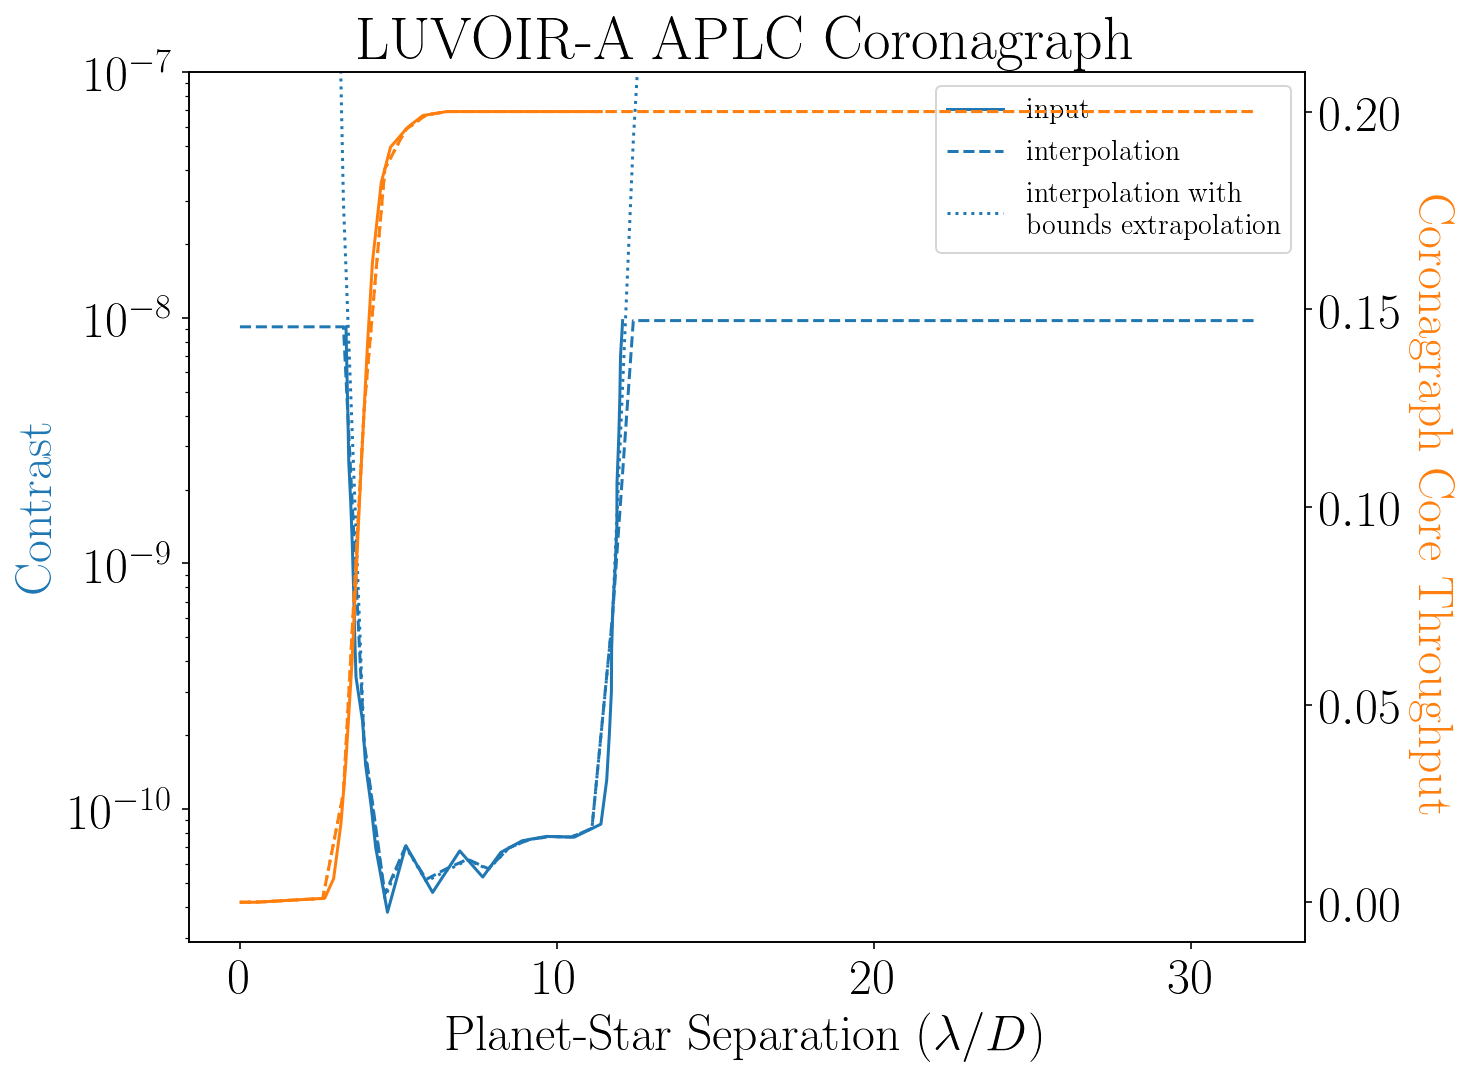

In [12]:
c_aplc = np.loadtxt("../inputs/LUVOIR_coronagraphs/APLC_Contrast1.txt", skiprows=1)
t_aplc = np.loadtxt("../inputs/LUVOIR_coronagraphs/APLC_Throughput1.txt", skiprows=1)

separr = np.linspace(0.0, 32.0)

# Interpolate linearly using numpy
csep = np.interp(separr, c_aplc[:,0], c_aplc[:,1])
tsep = np.interp(separr, t_aplc[:,0], t_aplc[:,1])

# Interpolate linearly with extrapolation using scipy
csep2 = scipy.interpolate.interp1d(c_aplc[:,0], np.log10(c_aplc[:,1]), bounds_error = False, fill_value="extrapolate")
tsep2 = scipy.interpolate.interp1d(t_aplc[:,0], t_aplc[:,1], bounds_error = False, fill_value="extrapolate")



fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel("Planet-Star Separation ($\lambda / D$)")
ax.set_title("LUVOIR-A APLC Coronagraph")

ax.set_ylabel("Contrast", color = "C0")
ax.plot(c_aplc[:,0], c_aplc[:,1], color = "C0", label = "input")
ax.plot(separr, csep, color = "C0", ls = "dashed", label = "interpolation")
ax.set_yscale("log")

ax2 = ax.twinx()
ax2.set_ylabel("Coronagraph Core Throughput", color = "C1", rotation = 270, labelpad = 27)
ax2.plot(t_aplc[:,0], t_aplc[:,1], color = "C1")
ax2.plot(separr, tsep, color = "C1", ls = "dashed")

ylim = ax.get_ylim()

ax.plot(separr, 10.**csep2(separr), color = "C0", ls = "dotted", label = "interpolation with \nbounds extrapolation")
ax2.plot(separr, tsep2(separr), color = "C1", ls = "dotted")

ax.set_ylim(ylim)
ax.set_ylim(top = 1e-7)

ax.legend(fontsize = 14)

# Explore connection with coronagraph model

In [19]:
# Create LUVOIR DRM
drmx = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "A (APLC)", 
    telescope_mods = {}
)

# Calculate table of exposure times
drmx.generate_exptime_table()

/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:293: RuntimeWarning: divide by zero encountered in true_divide
  Csig = self.Cratio/SNRt
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:294: RuntimeWarning: divide by zero encountered in true_divide
  Asig = self.A/SNRt
../scripts/spectroscopy.py:1336: RuntimeWarning: divide by zero encountered in double_scalars
  t_snr = (wantsnr**2 - intercept) / slope
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:290: RuntimeWarning: invalid value encountered in multiply
  SNRt  = self.cp * Dt / np.sqrt((self.cp + roll_factor*self.cb) * Dt)
/Users/Jake/Projects/coronagraph/coronagraph/count_rates.py:290: RuntimeWarning: invalid value encountered in true_divide
  SNRt  = self.cp * Dt / np.sqrt((self.cp + roll_factor*self.cb) * Dt)


In [20]:
print(drmx.cn.planet)
print(drmx.cn.star)

Planet: 
-------
- Planet name  : earth
- Stellar type of planet host star : sun
- Distance to system (pc) : 20.881
- Number of exzodis (zodis) : 5.063280000000001
- Radius of planet (Earth Radii) : 1.0
- Semi-major axis (AU) : 1.7051412008187845
- Phase angle (deg) : 90.0
- Lambertian phase function : 0.3183098861837907
- Zodiacal light surface brightness (mag/arcsec**2) : 23.0
- Exozodiacal light surface brightness (mag/arcsec**2) : 22.0
Star: 
-----
- Effective Temperature (K) : 6560.0
- Radius (Solar Radii) : 1.41


In [21]:
# Calculate planet-star angular separation (in radians)
sep_ps = drmx.cn.planet.a / drmx.cn.planet.distance * np.sin(drmx.cn.planet.alpha * np.pi/180.) * np.pi/180./3600.
sep_ps

3.9589855963818274e-07

In [22]:
lam = np.linspace(0.2, 2.0)

# Calculate lam/D (in radians)
lam_d = 1e-6 * lam / drmx.cn.telescope.diameter
lam_d

array([1.33333333e-08, 1.57823129e-08, 1.82312925e-08, 2.06802721e-08,
       2.31292517e-08, 2.55782313e-08, 2.80272109e-08, 3.04761905e-08,
       3.29251701e-08, 3.53741497e-08, 3.78231293e-08, 4.02721088e-08,
       4.27210884e-08, 4.51700680e-08, 4.76190476e-08, 5.00680272e-08,
       5.25170068e-08, 5.49659864e-08, 5.74149660e-08, 5.98639456e-08,
       6.23129252e-08, 6.47619048e-08, 6.72108844e-08, 6.96598639e-08,
       7.21088435e-08, 7.45578231e-08, 7.70068027e-08, 7.94557823e-08,
       8.19047619e-08, 8.43537415e-08, 8.68027211e-08, 8.92517007e-08,
       9.17006803e-08, 9.41496599e-08, 9.65986395e-08, 9.90476190e-08,
       1.01496599e-07, 1.03945578e-07, 1.06394558e-07, 1.08843537e-07,
       1.11292517e-07, 1.13741497e-07, 1.16190476e-07, 1.18639456e-07,
       1.21088435e-07, 1.23537415e-07, 1.25986395e-07, 1.28435374e-07,
       1.30884354e-07, 1.33333333e-07])

In [23]:
# Convert separation to units of lam/D 
sep_lam_d = sep_ps / lam_d
sep_lam_d

array([29.69239197, 25.08495184, 21.71533144, 19.14377904, 17.11679067,
       15.47794901, 14.12550686, 12.99042149, 12.02419179, 11.19174774,
       10.46710221,  9.83058923,  9.26705227,  8.76462173,  8.31386975,
        7.90721308,  7.53848294,  7.20260993,  6.89538961,  6.61330548,
        6.35339392,  6.11313952,  5.89039355,  5.6833094 ,  5.49029135,
        5.30995331,  5.14108554,  4.98262742,  4.8336452 ,  4.69331357,
        4.56090033,  4.43575368,  4.31729141,  4.20499193,  4.0983865 ,
        3.99705277,  3.90060913,  3.80870997,  3.72104145,  3.63731802,
        3.55727923,  3.4806871 ,  3.40732367,  3.33698901,  3.26949934,
        3.20468548,  3.14239138,  3.0824729 ,  3.02479669,  2.9692392 ])

In [24]:
# Interpolate coronagraph contrast and throughput to wavelength-dependent separation curves
csep = np.interp(sep_lam_d, cdat[:,0], cdat[:,1])
tsep = np.interp(sep_lam_d, tdat[:,0], tdat[:,1])

# Interpolate linearly with extrapolation using scipy
csep2 = 10.**scipy.interpolate.interp1d(cdat[:,0], np.log10(cdat[:,1]), bounds_error = False, fill_value="extrapolate")(sep_lam_d)
tsep2 = scipy.interpolate.interp1d(tdat[:,0], tdat[:,1], bounds_error = False, fill_value="extrapolate")(sep_lam_d)

(3.480331055664109e-13, 1e-07)

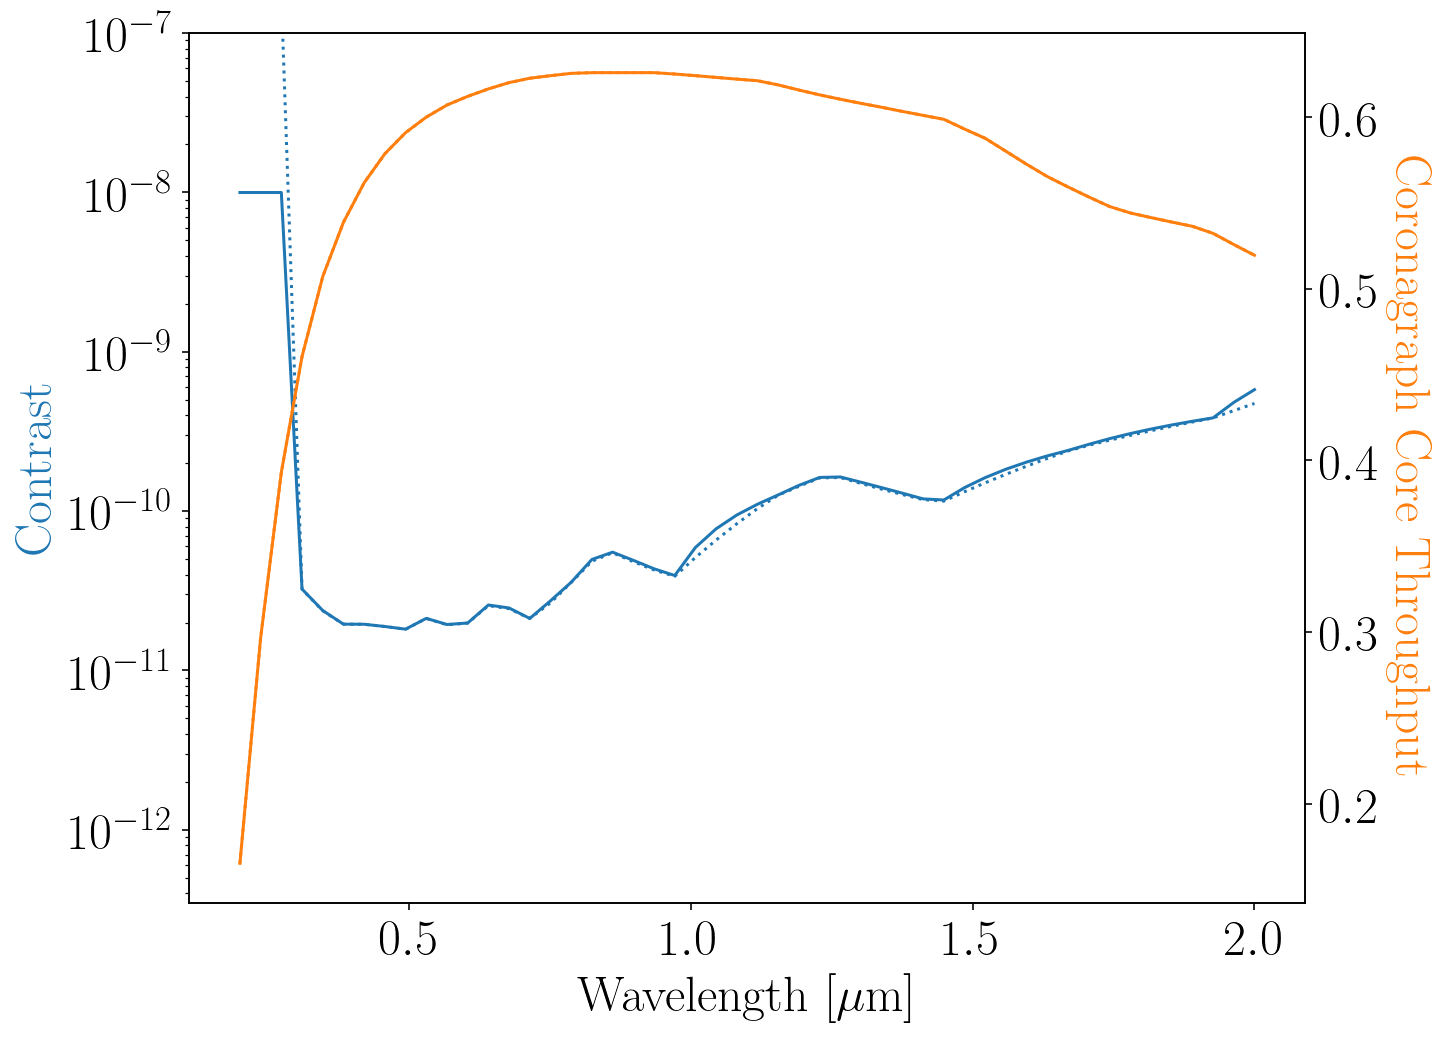

In [25]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_xlabel("Wavelength [$\mu$m]")

ax.set_ylabel("Contrast", color = "C0")
ax.plot(lam, csep, color = "C0")
ax.plot(lam, csep2, color = "C0", ls = "dotted")
ax.set_yscale("log")

ax2 = ax.twinx()
ax2.set_ylabel("Coronagraph Core Throughput", color = "C1", rotation = 270, labelpad = 27)
ax2.plot(lam, tsep, color = "C1")
ax2.plot(lam, tsep2, color = "C1", ls = "dotted")

ax.set_ylim(top = 1e-7)

# Test New Coronagraph Model with DRM code

Currently in the "separation" branch of the "coronagraph" model

In [23]:
# Create nominal LUVOIR DRM
drm1 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = [0.2, 0.2, 0.1], 
    architecture = "B", 
    telescope_mods = {}
)

# Calculate table of exposure times
drm1.generate_exptime_table()

In [13]:
# Create new LUVOIR DRM with new mods
drm2 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = [0.2, 0.2, 0.1], 
    architecture = "B", 
    telescope_mods = {"Tput_sep" : (t_piaa[:,0], t_piaa[:,1]), 
                      "C_sep" : (c_piaa[:,0], c_piaa[:,1])}
)

# Calculate table of exposure times
drm2.generate_exptime_table()

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/Jake/Projects/coronagraph/coronagraph/noise_routines.py:1017: RuntimeWarning: invalid value encountered in greater
  i = (cp > 0.)
/Users/Jake/Projects/coronagraph/coronagraph/noise_routines.py:1018: RuntimeWarning: invalid value encountered in less_equal
  j = (cp <= 0.0)


In [29]:
# Create new LUVOIR DRM with new mods
drm3 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = [0.2, 0.2, 0.1], 
    architecture = "B", 
    telescope_mods = {"Tput_sep" : (t_dmvc[:,0], t_dmvc[:,1]), 
                      "C_sep" : (c_dmvc[:,0], c_dmvc[:,1])}
)

# Calculate table of exposure times
drm3.generate_exptime_table()

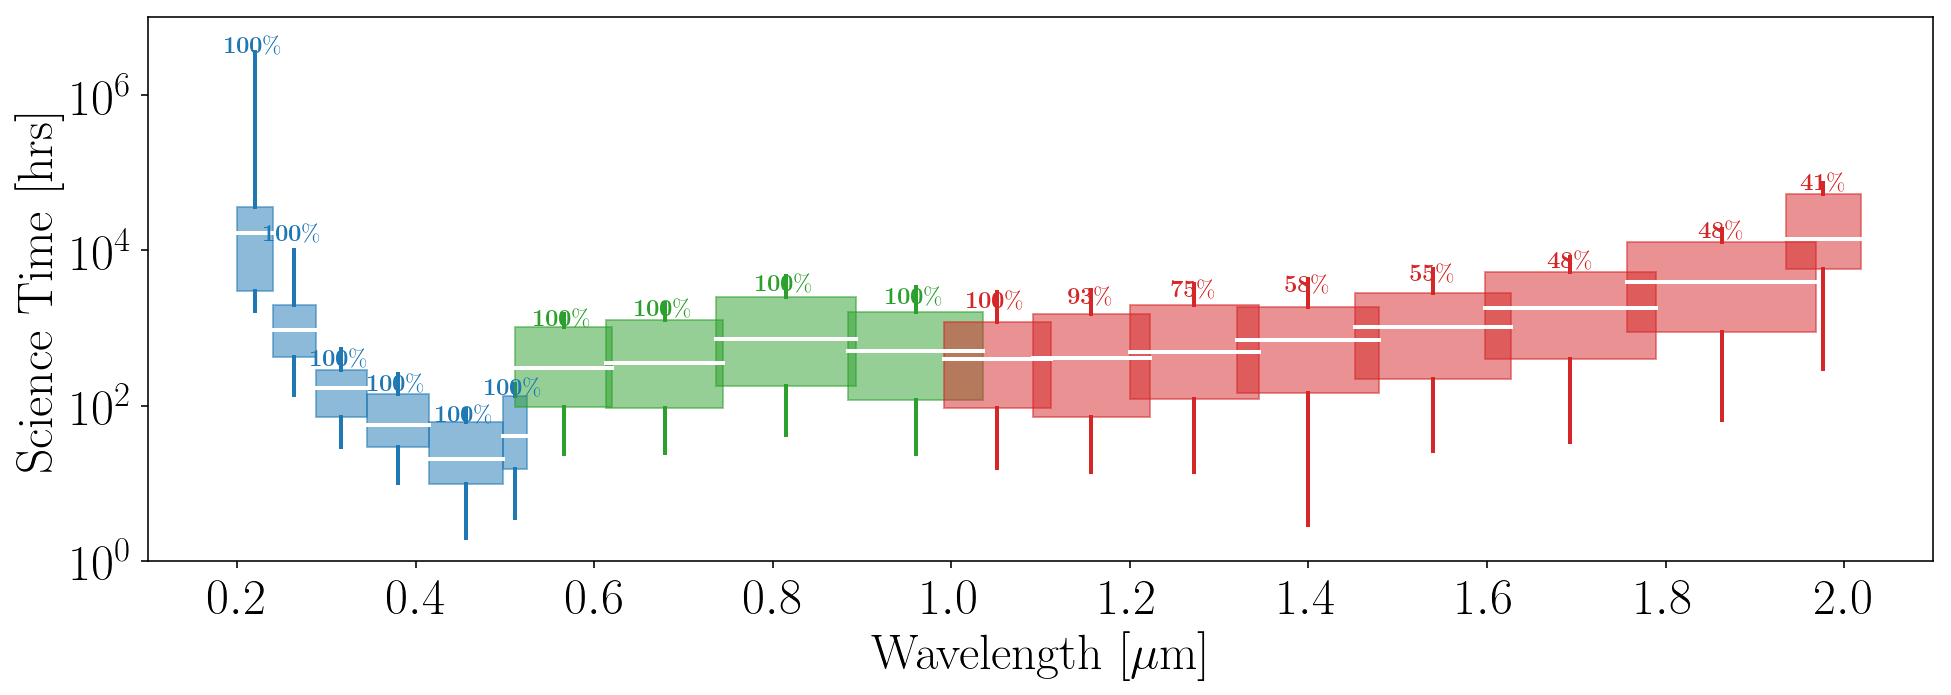

In [25]:
fig = drm1.plot_bp_exptimes(plot_spectrum=False)

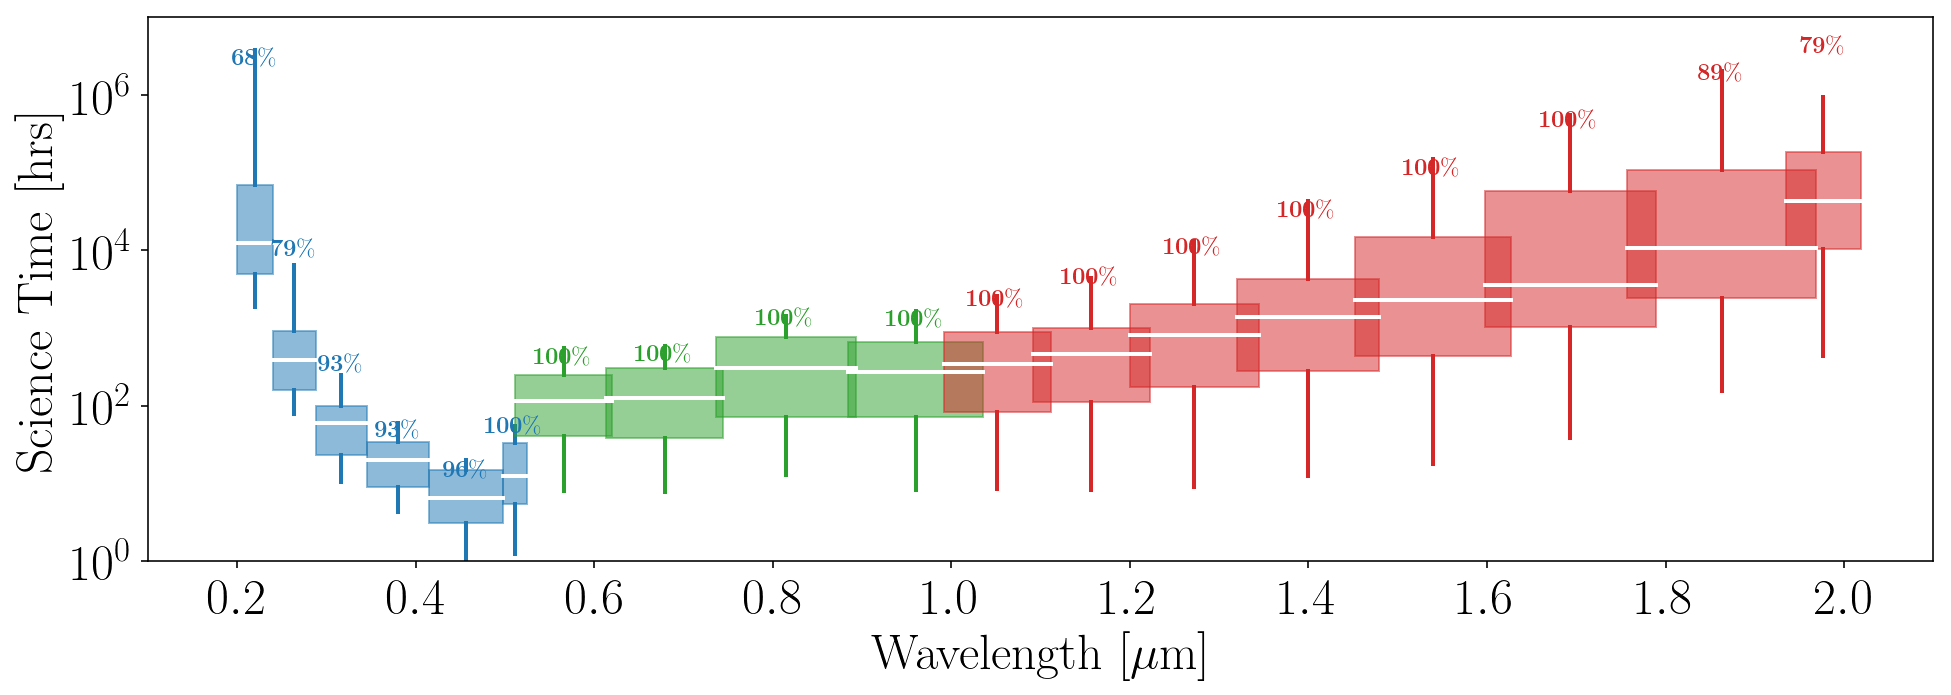

In [14]:
fig = drm2.plot_bp_exptimes(plot_spectrum=False)

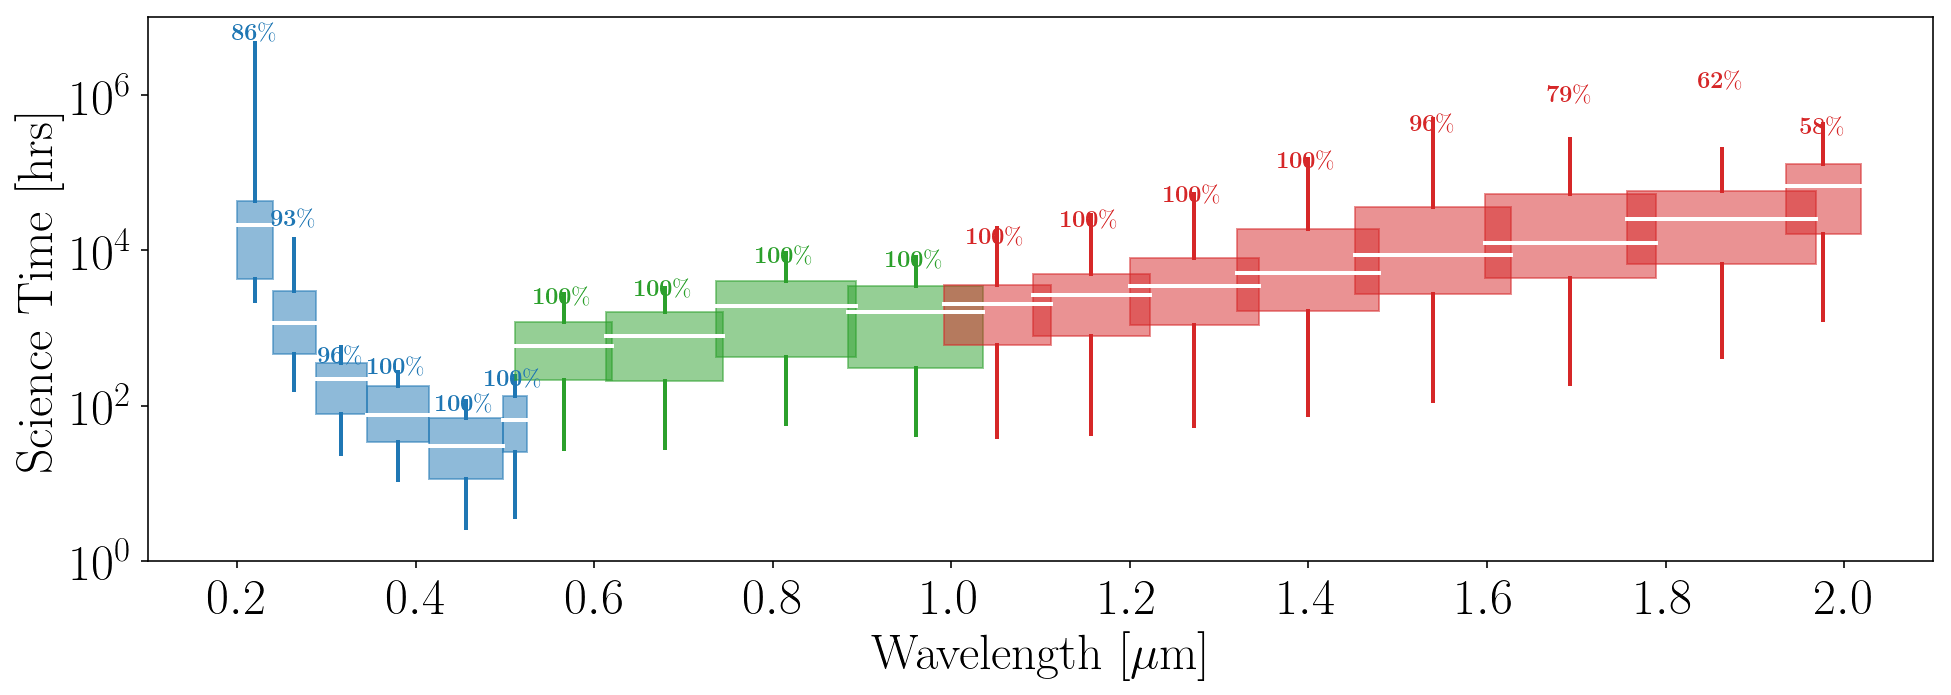

In [30]:
fig = drm3.plot_bp_exptimes(plot_spectrum=False)

## Try plotting all the contrast and throughput curves to make sense out of the changes

In [26]:
drmx = drm2

teff = np.zeros(drmx.NBIAS)
dist = np.zeros(drmx.NBIAS)
for i in range(drmx.NBIAS):
    drmx.prep_ith_star(i)
    teff[i] = drmx.cn.star.Teff
    dist[i] = drmx.cn.planet.distance

In [27]:
colors, smap, cnorm = colorize(dist, cmap="Blues_r")

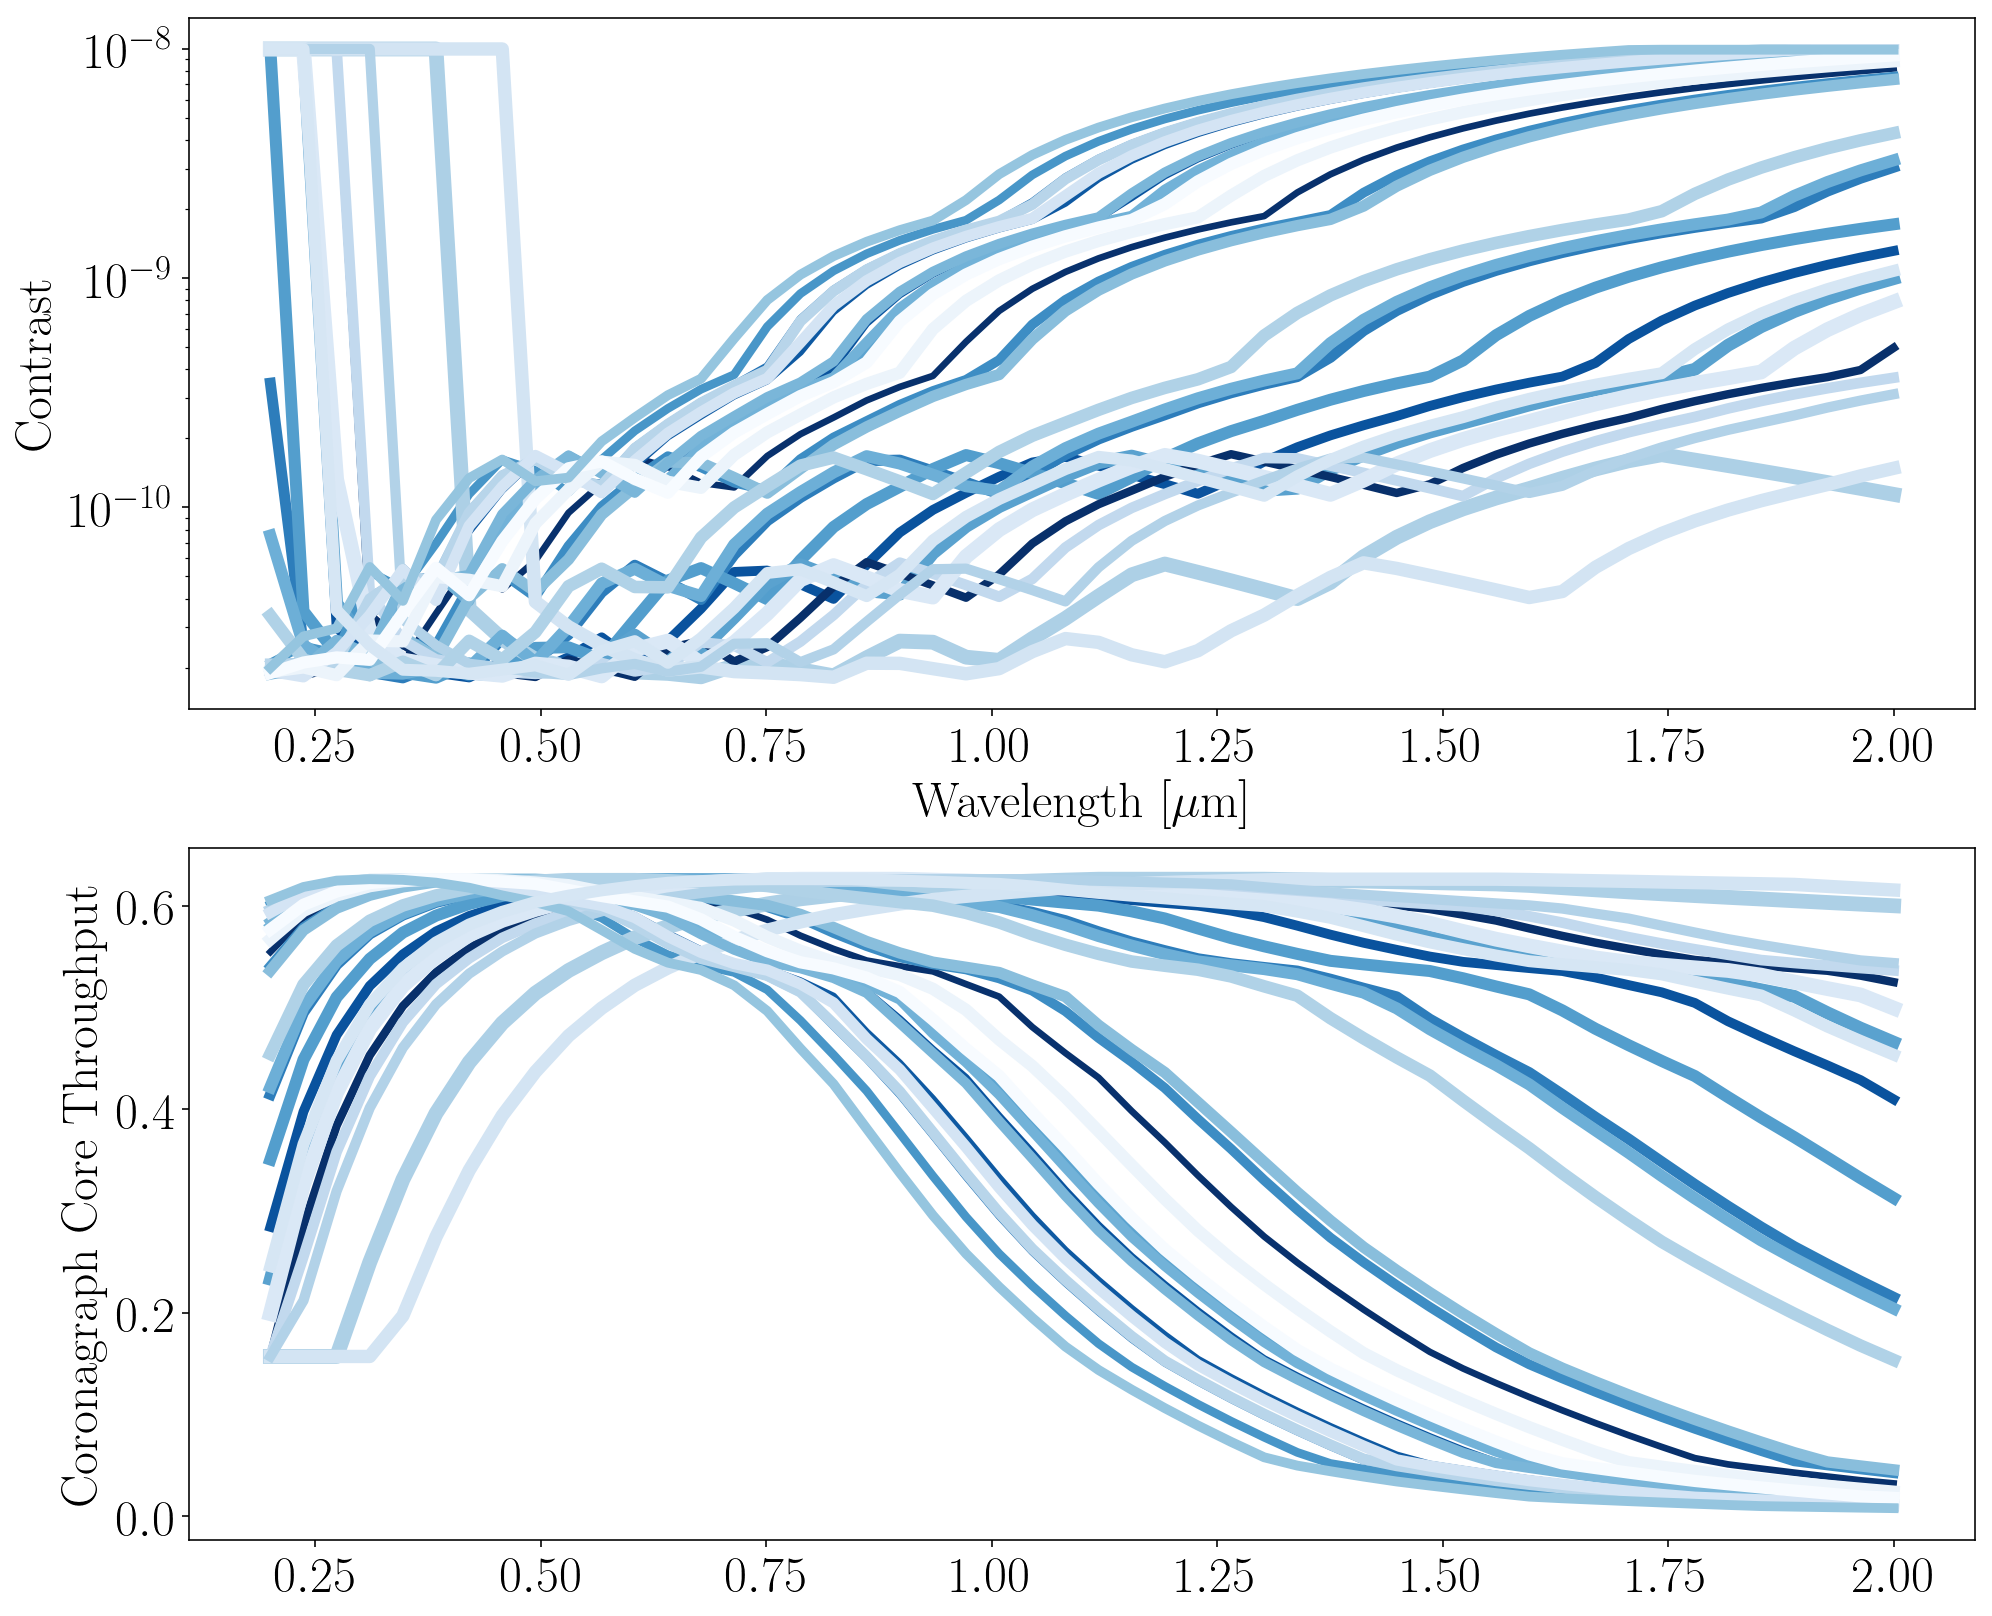

In [28]:
fig, axs = plt.subplots(2, 1, figsize = (16,14))
ax = axs[0]
ax2 = axs[1]

ax2.set_xlabel("Wavelength [$\mu$m]")

ax.set_ylabel("Contrast")
ax.set_yscale("log")

ax2.set_ylabel("Coronagraph Core Throughput")

for i in range(drmx.NBIAS):
    
    drmx.prep_ith_star(i)
    
    # Calculate planet-star angular separation (in radians)
    sep_ps = drmx.cn.planet.a / drmx.cn.planet.distance * np.sin(drmx.cn.planet.alpha * np.pi/180.) * np.pi/180./3600.
    
    # Calculate lam/D (in radians)
    lam_d = 1e-6 * lam / drmx.cn.telescope.diameter
    
    # Convert separation to units of lam/D 
    sep_lam_d = sep_ps / lam_d
    
    # Interpolate coronagraph contrast and throughput to wavelength-dependent separation curves
    csep = np.interp(sep_lam_d, cdat[:,0], cdat[:,1])
    tsep = np.interp(sep_lam_d, tdat[:,0], tdat[:,1])
        
    ax.plot(lam, csep, color = colors[i], alpha = 1.,  lw = (teff[i] / 1000))
    ax2.plot(lam, tsep, color = colors[i], alpha = 1., lw = (teff[i] / 1000))    


In [1]:
a = "A (DMVC)"

In [4]:
"DMVC".lower() in a.lower()

True